# Wildfire Activity in Australia: Analysis

#### Importing our libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

#### Importing our data:

In [2]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv'
df = pd.read_csv(url)
print('data imported!')

data imported!


#### Inspecting our data:

In [3]:
df.shape

(26406, 10)

In [4]:
df.head(2)

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.4000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.3625,85.500000,8.088793,65.428571,8,R


Examining datatypes:

In [5]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

<code>'Date'</code> is type <code>object</code>, to make it easier to use let's convert it to a <code>datetime</code> type.</br>
Let's also extract the __month__ and __year__ from <code>'Date'</code> and include them as separate columns, in order simplify analysis.

In [6]:
# converting date to datetime obj
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
# adding new columns Year and Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [8]:
# verifying our changes
df.dtypes

Region                                         object
Date                                   datetime64[ns]
Estimated_fire_area                           float64
Mean_estimated_fire_brightness                float64
Mean_estimated_fire_radiative_power           float64
Mean_confidence                               float64
Std_confidence                                float64
Var_confidence                                float64
Count                                           int64
Replaced                                       object
Year                                            int64
Month                                           int64
dtype: object

### 1.1: Examining change in average estimated fire area over time (years)

In [17]:
# extracting average estimated fire area by year
df_line = df.groupby('Year')['Estimated_fire_area'].mean()
df_line.head()

Year
2005     92.770501
2006    176.289434
2007    153.112464
2008     99.758968
2009    141.624955
Name: Estimated_fire_area, dtype: float64

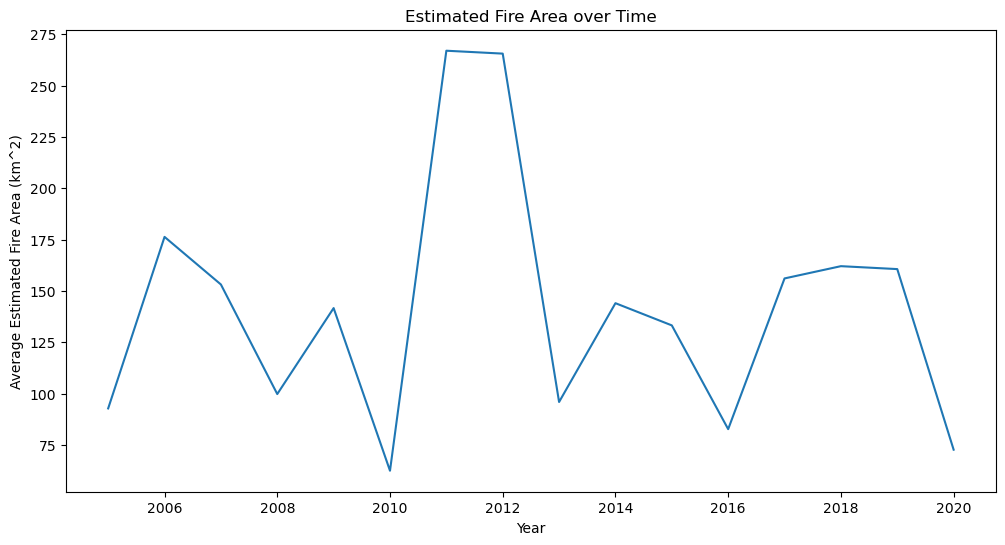

In [18]:
# plotting series
plt.figure(figsize=(12, 6))
df_line.plot(x=df_line.index,y=df_line.values)
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km^2)')
plt.title('Estimated Fire Area over Time')
plt.show()

##### We can see pretty drastic peak between 2010 and 2013, let's see if we can narrow down our findings.

### 1.2: Examining change in average estimated fire area over time (years and months)

In [11]:
# extracting average estimated fire area by year and month
df_line = df.groupby(['Year','Month'])['Estimated_fire_area'].mean()
df_line.head(12)

Year  Month
2005  1         70.619908
      2        101.018747
      3         40.901576
      4         69.305388
      5         93.834520
      6         53.008088
      7         68.894702
      8         85.339337
      9        114.282408
      10       177.676820
      11       163.266122
      12       111.906784
Name: Estimated_fire_area, dtype: float64

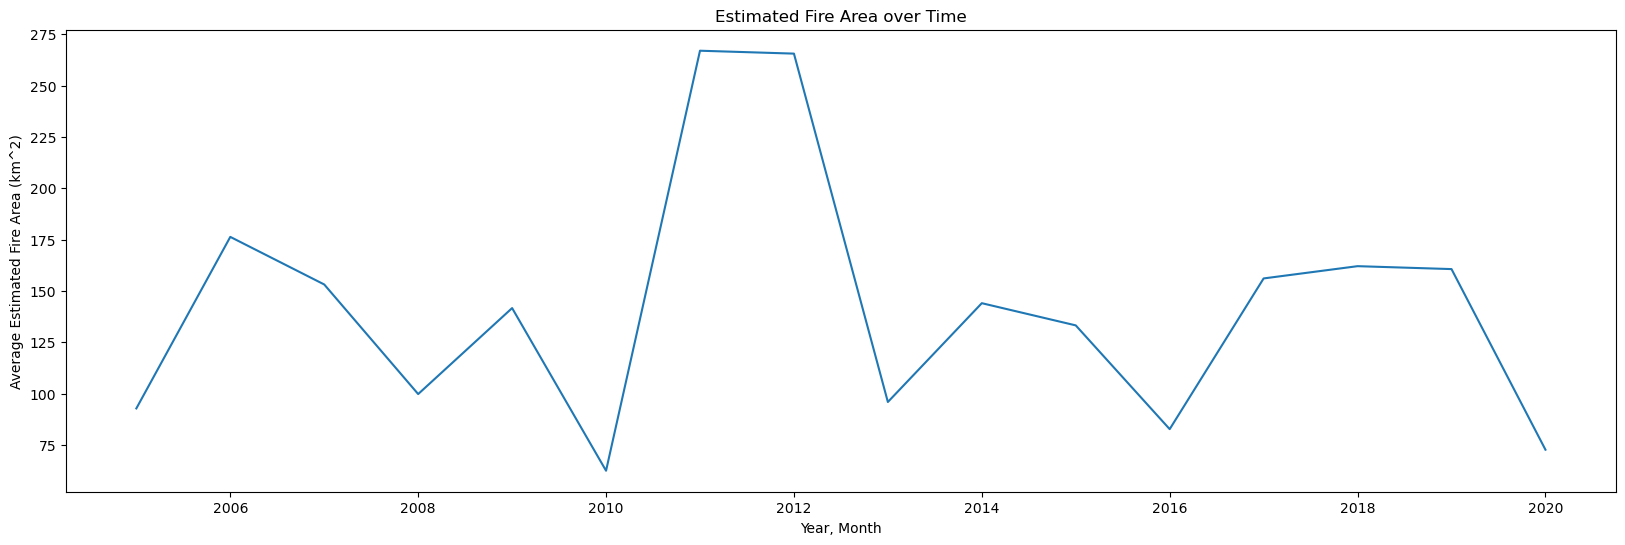

In [19]:
# plotting series
plt.figure(figsize=(20, 6))
df_line.plot(x=df_line.index,y=df_line.values)
plt.xlabel('Year, Month')
plt.ylabel('Average Estimated Fire Area (km^2)')
plt.title('Estimated Fire Area over Time')
plt.show()

##### After taking a closer look, we can see that our peak happened after April 2011 and before 2012.

### 1.3: Examining the distribution of average estimated fire brightness across regions

In [13]:
df['Region'].unique()
# 7 unique regions

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

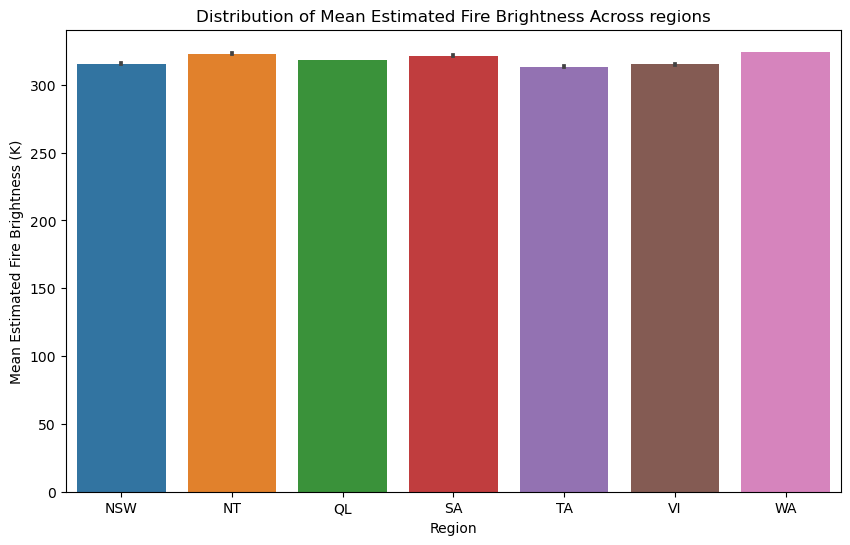

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,
            x='Region',
            y='Mean_estimated_fire_brightness')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (K)')
plt.title('Distribution of Mean Estimated Fire Brightness Across regions')
plt.show()

### 1.4: Illustrating proportion of presumed vegetagion fires across regions

First, let's refresh what <code>count</code> is:</br> "Daily numbers of pixels for presumed vegetation fires with a confidence level of larger than 75% for a given region"

In [25]:
# grouping data by region, extracting sum of count per region
df_pie = df.groupby('Region')['Count'].sum(numeric_only=True)
df_pie.head(7)

Region
NSW    117412
NT     649430
QL     420882
SA      35160
TA      11473
VI      52473
WA     615968
Name: Count, dtype: int64

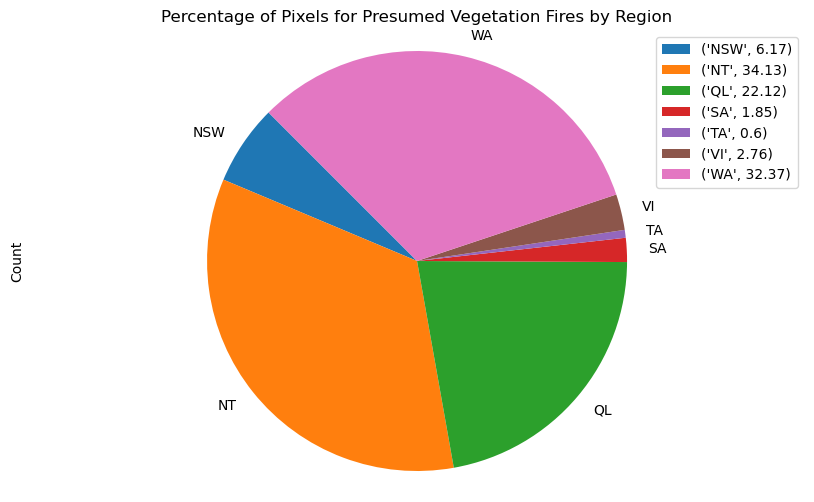

In [40]:
df_pie.plot(kind='pie',
            figsize=(10,6),
            startangle=135)
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.axis('equal')
plt.legend([(i,round(k/df_pie.sum()*100,2)) for i,k in zip(df_pie.index, df_pie)])

plt.show()

### 1.5: Developing a histogram of the average estimated fire brightness

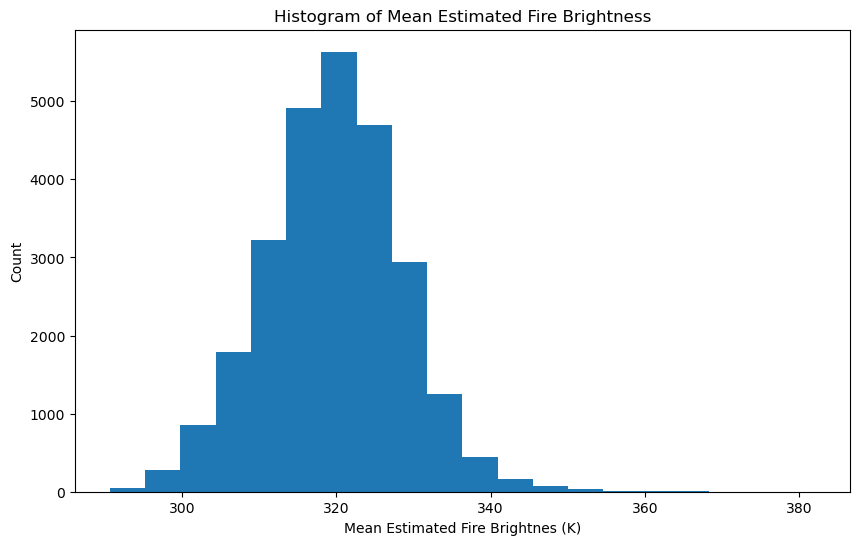

In [43]:
plt.figure(figsize=(10,6))
plt.hist(x=df['Mean_estimated_fire_brightness'], bins=20)
plt.xlabel('Mean Estimated Fire Brightnes (K)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()

### 1.6: Developing a histogram of the estimated fire brightness across regions

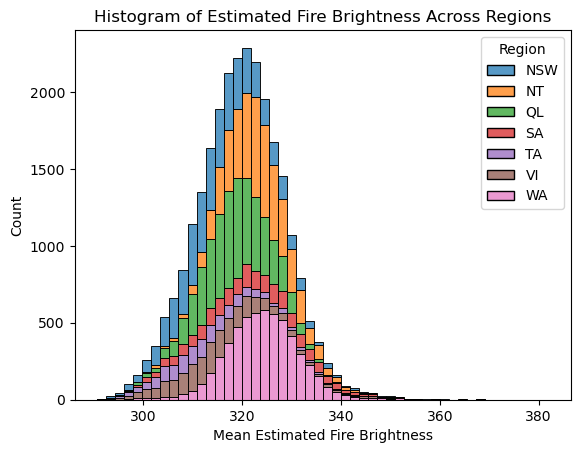

In [59]:
sns.histplot(data=df,
             x='Mean_estimated_fire_brightness',
             hue='Region',
             multiple='stack',
             bins=50) # extra
plt.title('Histogram of Estimated Fire Brightness Across Regions')
plt.xlabel('Mean Estimated Fire Brightness')
plt.ylabel('Count')
plt.show()

### 1.7: Identifying possible correlation between estimated fire radiative power and mean condfidence level

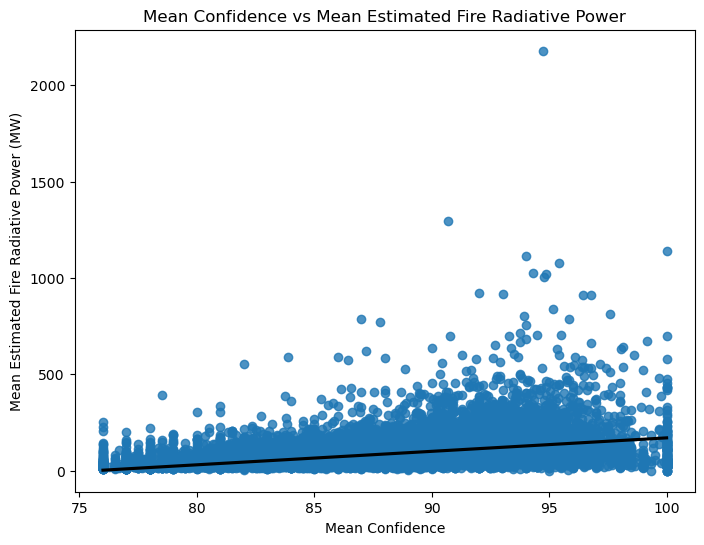

In [66]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df,
            x='Mean_confidence',
            y='Mean_estimated_fire_radiative_power',
            line_kws=dict(color="black"))
plt.xlabel('Mean Confidence')
plt.ylabel('Mean Estimated Fire Radiative Power (MW)')
plt.title('Mean Confidence vs Mean Estimated Fire Radiative Power')
plt.show()


### 1.7: Marking our seven regions on the map of Australia

In [69]:
regions_df = pd.DataFrame({'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]})
regions_df

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [73]:
# creating feature group
aus_reg = folium.map.FeatureGroup()
# creating folium map centered on Australia
aus_map = folium.Map(location=[-25, 135],
                     zoom_start=4)
# adding regions to feature group
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker([lat,lng],
                                     popup=lab,
                                     radius=5,
                                     color='r',
                                     fill=True,
                                     fill_color='blue',
                                     fill_opacity=0.6
                                    )
    )
aus_map.add_child(aus_reg)